**ROCK MELON CROP YIELD PREDICTION CLASSIFICATION**

Hello reader!

For this code, it used dummy data collected from Irfan and Syazana, final year students from Faculty of Agriculture.

In [1]:
import pandas as pd

# To read 'csv' file with panda library
df = pd.read_csv('/content/drive/MyDrive/allRock2.csv')

**Data analysis**

Checking the basic information of the dataset, display and check for any missing values.


In [2]:
# To display the first 10 rows of dataset
display(df.head(10))

Treatment   Variety  PlantHeight15DAT(cm)  PlantHeight30DAT(cm)  \
0        T1  Chanchai                  17.0                  78.0   
1        T1   Glamour                  29.0                  87.0   
2        T1   Glamour                  20.0                  49.0   
3        T1  Chanchai                  20.0                  34.0   
4        T1   Glamour                  22.0                 109.0   
5        T1  Chanchai                  23.0                  40.0   
6        T1   Glamour                  20.0                  96.0   
7        T1   Glamour                  22.0                  87.0   
8        T1  Chanchai                  27.0                  95.0   
9        T1  Chanchai                  29.0                  80.0   

   GrowthRateIn15Days BurnLeaf  RockMelonHarvested  
0                61.0      75%                   1  
1                58.0      75%                   1  
2                29.0      50%                   1  
3                14.0      75%                   0  
4                87.0      75%                   1  
5                17.0      75%                   0  
6                76.0      75%                   1  
7                65.0      75%                   1  
8                68.0      75%                   1  
9                51.0      75%                   1

In [3]:
# To find Column name
df.columns

Index(['Treatment', 'Variety', 'PlantHeight15DAT(cm)', 'PlantHeight30DAT(cm)',
       'GrowthRateIn15Days', 'BurnLeaf', 'RockMelonHarvested'],
      dtype='object')

In [4]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(108, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Treatment             108 non-null    object 
 1   Variety               108 non-null    object 
 2   PlantHeight15DAT(cm)  108 non-null    float64
 3   PlantHeight30DAT(cm)  108 non-null    float64
 4   GrowthRateIn15Days    108 non-null    float64
 5   BurnLeaf              108 non-null    object 
 6   RockMelonHarvested    108 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ KB


None

In [5]:
df['RockMelonHarvested'].value_counts()

1    50
2    47
3     8
0     3
Name: RockMelonHarvested, dtype: int64

In [6]:
print(df.dtypes)

Treatment                object
Variety                  object
PlantHeight15DAT(cm)    float64
PlantHeight30DAT(cm)    float64
GrowthRateIn15Days      float64
BurnLeaf                 object
RockMelonHarvested        int64
dtype: object


In [7]:
import numpy

#change value types of 'RockMelonHarvested' from int to object
#df["RockMelonHarvested"]=df["RockMelonHarvested"].astype(numpy.object)
#print(df.dtypes)

In [8]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Treatment               0
Variety                 0
PlantHeight15DAT(cm)    0
PlantHeight30DAT(cm)    0
GrowthRateIn15Days      0
BurnLeaf                0
RockMelonHarvested      0
dtype: int64

In [9]:
# check for the data types, memory usage, etc
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Treatment             108 non-null    object 
 1   Variety               108 non-null    object 
 2   PlantHeight15DAT(cm)  108 non-null    float64
 3   PlantHeight30DAT(cm)  108 non-null    float64
 4   GrowthRateIn15Days    108 non-null    float64
 5   BurnLeaf              108 non-null    object 
 6   RockMelonHarvested    108 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ KB


None

In [10]:
# statistics of the numerical variables
display(df.describe().T)

count       mean        std   min   25%   50%     75%  \
PlantHeight15DAT(cm)  108.0  40.337963  28.922296   9.0  20.0  23.0   75.00   
PlantHeight30DAT(cm)  108.0  92.925926  33.594463  25.0  71.5  88.5  114.25   
GrowthRateIn15Days    108.0  52.587963  19.841643   3.0  39.0  54.0   65.25   
RockMelonHarvested    108.0   1.555556   0.674410   0.0   1.0   2.0    2.00   

                        max  
PlantHeight15DAT(cm)  100.0  
PlantHeight30DAT(cm)  190.0  
GrowthRateIn15Days    100.0  
RockMelonHarvested      3.0

In [11]:
# statistics of the category variables
display(df.describe(include='object'))

Treatment  Variety BurnLeaf
count        108      108      108
unique         3        2        3
top           T3  Glamour      25%
freq          43       72       61

**Data visualization**

Using matplotlib and seaborn library to visualize the data in form of the graphs.

In [12]:
import matplotlib.pyplot as plt # to visualize graph
import seaborn as sns # for better visualization of graph with the help of Matplotlib

<Axes: xlabel='count', ylabel='RockMelonHarvested'>

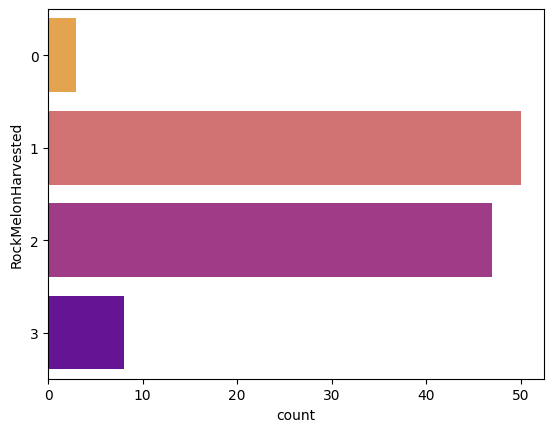

In [13]:
#Visualization of the class in RockMelonHarvested category with countplot
sns.countplot(y='RockMelonHarvested',data=df,palette="plasma_r")

<Axes: xlabel='count', ylabel='Treatment'>

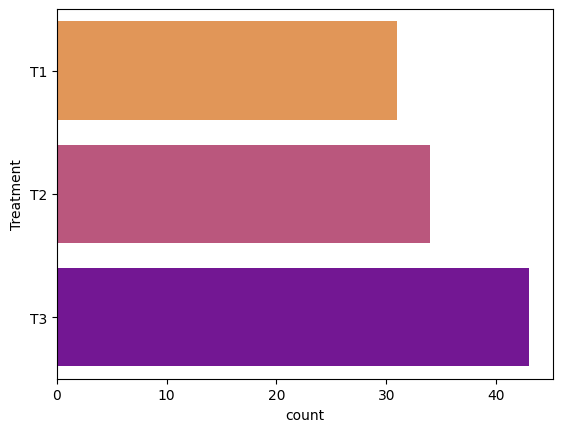

In [14]:
#Visualization of the class in RockMelonHarvested category with countplot
sns.countplot(y='Treatment',data=df,palette="plasma_r")

In [15]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['RockMelonHarvested'])

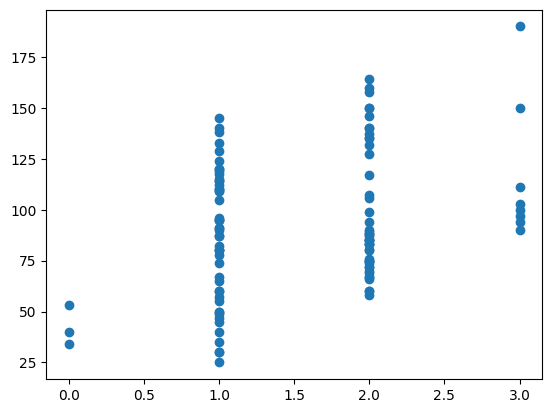

In [16]:
#check the linear relationship between two variables
PlantHeight30DAT = df['PlantHeight30DAT(cm)']
RockMelonHarvested = df['RockMelonHarvested']
#scatter plot for the dataset
plt.scatter(RockMelonHarvested, PlantHeight30DAT)
plt.show()

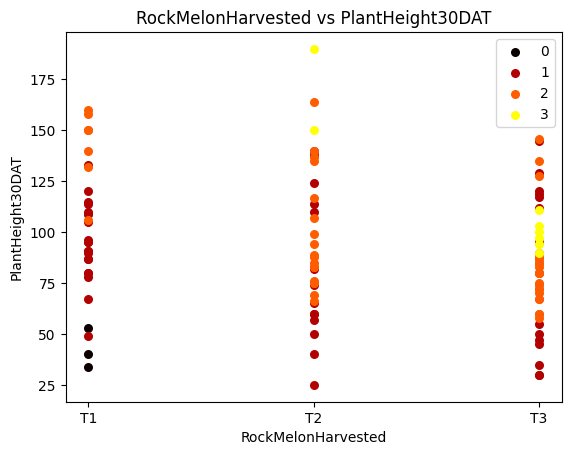

In [17]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

#check the linear relationship between two variables
y = df['PlantHeight30DAT(cm)']
x = df['Treatment']

# Get unique names of species
uniq = list(set(df['RockMelonHarvested']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = df['RockMelonHarvested'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=30, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('RockMelonHarvested')
plt.ylabel('PlantHeight30DAT')
plt.title('RockMelonHarvested vs PlantHeight30DAT')
plt.legend()
plt.show()

<ipython-input-15-22199cddef8b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=axes[0])


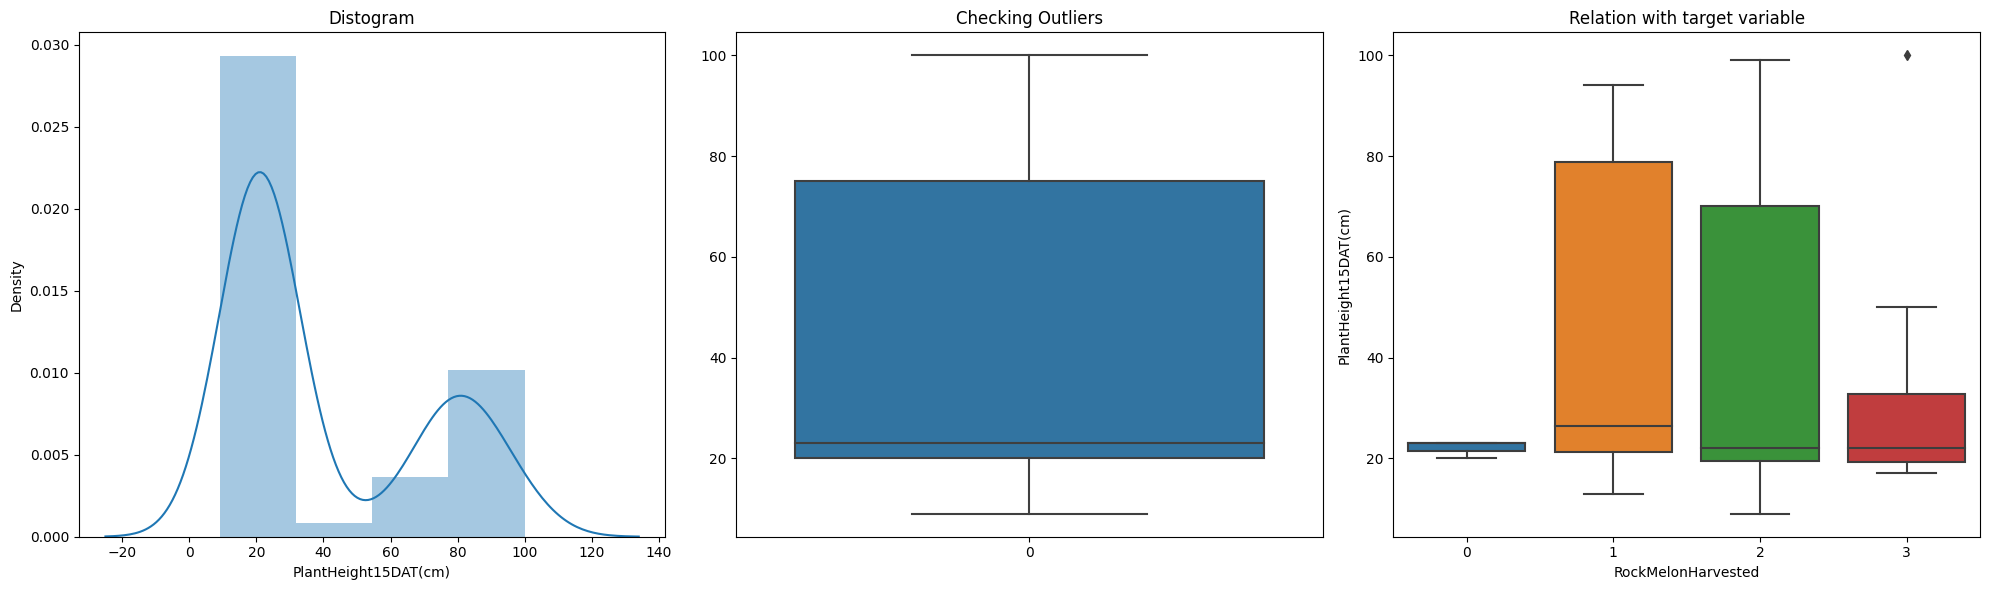

In [18]:
# Exploratory Data Analysis (EDA) - PlantHeight15DAT variable
plot_conti(df['PlantHeight15DAT(cm)'])

<ipython-input-15-22199cddef8b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=axes[0])


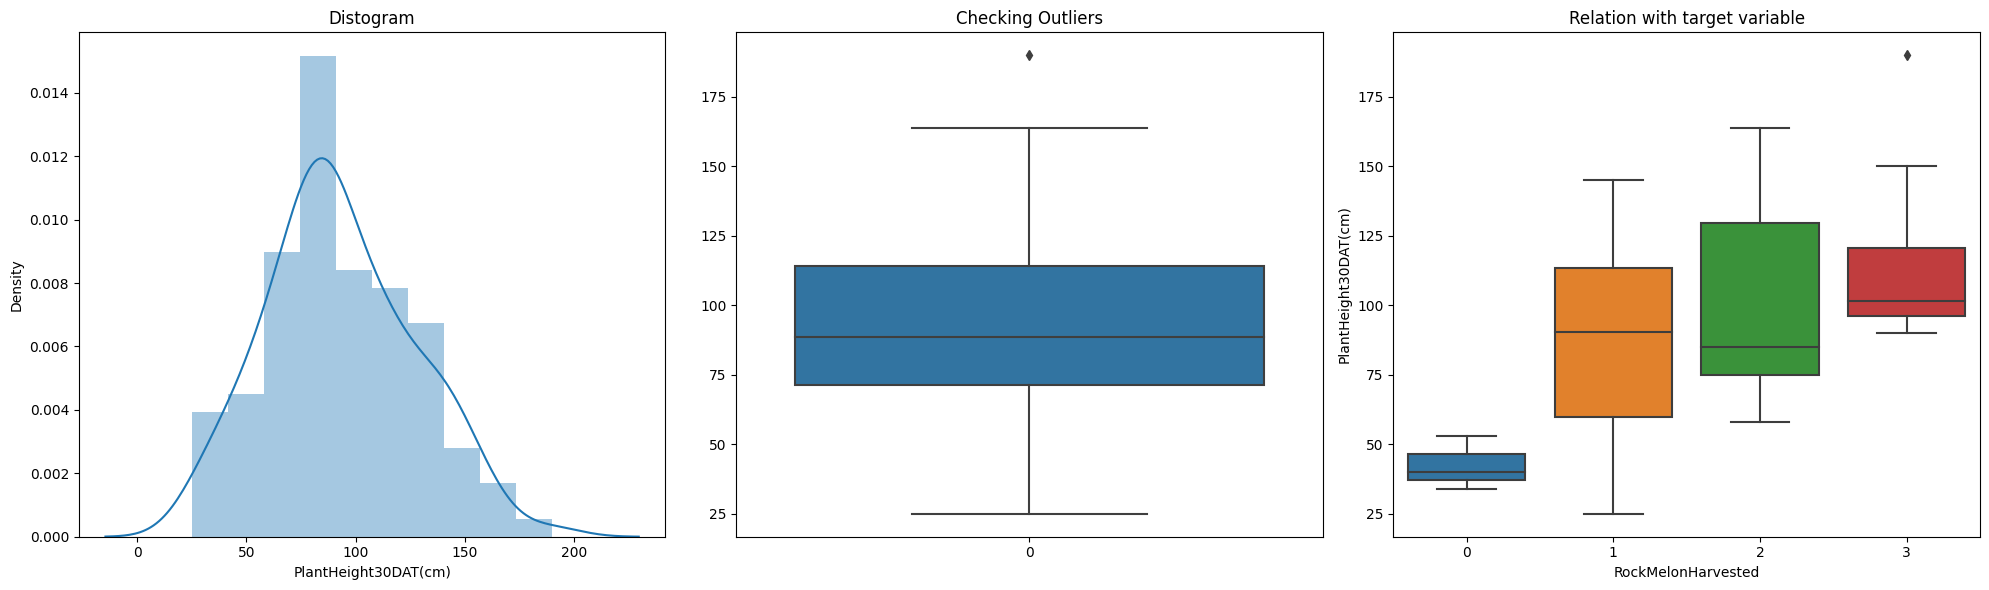

In [19]:
# Exploratory Data Analysis (EDA) - PlantHeight30DAT variable
plot_conti(df['PlantHeight30DAT(cm)'])

In [20]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['RockMelonHarvested'], ax=axes[1])

In [21]:
#EDA - Variety variable
#plot_cato(df['Treatment'])

In [23]:
#EDA - Variety variable
#plot_cato(df['Variety'])

In [25]:
#EDA - BurnLeaf_variable
#plot_cato(df['BurnLeaf'])

In [26]:
#To find out correlation with both nominal and numeric variables
#nominal.associations(df,figsize=(16,10),
                     #mark_columns=True,
                     #title="Pearson Correlation Coefficient between RockMelonHarvested prediction variables",
                     #cmap='RdYlGn')

**Data preprocessing**

Change string value in the dataset into value so machine learning can be realized. Normalize the data for more accurate prediction. Splitting the data into train and test dataset.

In [27]:
df.head(10)

Treatment   Variety  PlantHeight15DAT(cm)  PlantHeight30DAT(cm)  \
0        T1  Chanchai                  17.0                  78.0   
1        T1   Glamour                  29.0                  87.0   
2        T1   Glamour                  20.0                  49.0   
3        T1  Chanchai                  20.0                  34.0   
4        T1   Glamour                  22.0                 109.0   
5        T1  Chanchai                  23.0                  40.0   
6        T1   Glamour                  20.0                  96.0   
7        T1   Glamour                  22.0                  87.0   
8        T1  Chanchai                  27.0                  95.0   
9        T1  Chanchai                  29.0                  80.0   

   GrowthRateIn15Days BurnLeaf  RockMelonHarvested  
0                61.0      75%                   1  
1                58.0      75%                   1  
2                29.0      50%                   1  
3                14.0      75%                   0  
4                87.0      75%                   1  
5                17.0      75%                   0  
6                76.0      75%                   1  
7                65.0      75%                   1  
8                68.0      75%                   1  
9                51.0      75%                   1

In [28]:
df.dtypes

Treatment                object
Variety                  object
PlantHeight15DAT(cm)    float64
PlantHeight30DAT(cm)    float64
GrowthRateIn15Days      float64
BurnLeaf                 object
RockMelonHarvested        int64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
#Label Encoding to change all value into numeric value
le = LabelEncoder()
df['Treatment']= le.fit_transform(df['Treatment'])
print(le.classes_)
df['Variety']= le.fit_transform(df['Variety'])
print(le.classes_)
df['BurnLeaf']= le.fit_transform(df['BurnLeaf'])
print(le.classes_)
df['RockMelonHarvested']= le.fit_transform(df['RockMelonHarvested'])
print(le.classes_)

['T1' 'T2' 'T3']
['Chanchai' 'Glamour']
['25%' '50%' '75%']
[0 1 2 3]


In [30]:
df.dtypes

Treatment                 int64
Variety                   int64
PlantHeight15DAT(cm)    float64
PlantHeight30DAT(cm)    float64
GrowthRateIn15Days      float64
BurnLeaf                  int64
RockMelonHarvested        int64
dtype: object

In [31]:
df.shape

(108, 7)

**Feature Scaling**

In [32]:
from sklearn.preprocessing import MinMaxScaler # to normalize data

y = df['RockMelonHarvested']
X = df.drop('RockMelonHarvested', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'RockMelonHarvested', y)

scaled_df = data_without_yield

In [33]:
print(scaled_df)

     Treatment  Variety  PlantHeight15DAT(cm)  PlantHeight30DAT(cm)  \
0          0.0      0.0              0.087912              0.321212   
1          0.0      1.0              0.219780              0.375758   
2          0.0      1.0              0.120879              0.145455   
3          0.0      0.0              0.120879              0.054545   
4          0.0      1.0              0.142857              0.509091   
..         ...      ...                   ...                   ...   
103        0.0      1.0              0.780220              0.509091   
104        0.5      1.0              0.934066              0.684848   
105        1.0      1.0              0.670330              0.733333   
106        0.0      1.0              0.604396              0.648485   
107        0.5      1.0              0.780220              0.666667   

     GrowthRateIn15Days  BurnLeaf  RockMelonHarvested  
0              0.597938       1.0                   1  
1              0.567010       1.0  

**Modeling**

In [34]:
y = scaled_df['RockMelonHarvested']
X = scaled_df.drop('RockMelonHarvested', axis=1)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
print(grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': 3}


In [36]:
#test knn algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Print the accuracy of the model
print("Model : K-Nearest Neighbor")
print("Accuracy: {:.2f}".format(knn.score(X_test, y_test)))
print(classification_report(y_pred, y_test));


Model : K-Nearest Neighbor
Accuracy: 0.79
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.88      0.74      0.80        19
           3       0.00      0.00      0.00         0

    accuracy                           0.79        33
   macro avg       0.54      0.53      0.53        33
weighted avg       0.82      0.79      0.80        33



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#using logistic regression to predict the crop yield
from time import process_time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#splitting to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#model
lr = LogisticRegression()

#model LogisticRegression created - learn
start_lr = process_time()
model_lr = lr.fit(X_train, y_train)

#test the model
predictions_lr = model_lr.predict(X_test)
executiontime_lr = process_time() - start_lr

#find the accuracy for classifier
accuracy_lr = accuracy_score(y_test, predictions_lr)

#evaluate
print("Model : Logistic Regression")
#print("Time taken to train and test in seconds : ",executiontime_lr)
print("Accuracy : ", accuracy_lr)
print(classification_report(predictions_lr, y_test));

Model : Logistic Regression
Accuracy :  0.7272727272727273
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.88      0.82        16
           2       0.91      0.59      0.71        17
           3       0.00      0.00      0.00         0

    accuracy                           0.73        33
   macro avg       0.42      0.37      0.38        33
weighted avg       0.85      0.73      0.77        33



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#using random forest classifier to predict crop yield
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#splitting dataset for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion="entropy")

# Train
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

#find the accuracy for classifier
accuracy_rfc = accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#accuracy_score(y_test,y_predict)
print("Model : Random Forest Classifier")
print("Accuracy : ", accuracy_rfc)
print(classification_report(y_predict, y_test));

Model : Random Forest Classifier
Accuracy :  0.6666666666666666
              precision    recall  f1-score   support

           1       0.72      0.72      0.72        18
           2       0.57      0.62      0.59        13
           3       1.00      0.50      0.67         2

    accuracy                           0.67        33
   macro avg       0.76      0.61      0.66        33
weighted avg       0.68      0.67      0.67        33



In [39]:
#using random forest classifier to predict crop yield
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy_rfc=0
count=0
while(accuracy_rfc<0.9):
  count=count+1
  #splitting dataset for test and train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  # Model (can also use single decision tree)
  from sklearn.ensemble import RandomForestClassifier
  model = RandomForestClassifier(n_estimators=10, criterion="entropy")

  # Train
  model.fit(X_train,y_train)

  y_predict = model.predict(X_test)

  #find the accuracy for classifier
  accuracy_rfc = accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#accuracy_score(y_test,y_predict)
print("Model : Random Forest Classifier")
print("Accuracy : ", accuracy_rfc)
print(classification_report(y_predict, y_test));
print(count)

Model : Random Forest Classifier
Accuracy :  0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      1.00      0.92        17
           2       1.00      0.77      0.87        13
           3       1.00      1.00      1.00         2

    accuracy                           0.91        33
   macro avg       0.96      0.94      0.95        33
weighted avg       0.92      0.91      0.91        33

18


In [40]:
# test the model with input from user but with different approach of scaling
'''df1 = pd.read_csv('/content/drive/MyDrive/allRock2.csv')
df1 = df1.drop('Treatment', axis=1)
df1 = df1.drop('RockMelonHarvested', axis=1)

df2 = pd.DataFrame([["Chanchai",34,99,99-34,"25%"]],columns=df1.columns)

df1 = df1.append(df2)
print(df1.tail(1))

df1['Variety']= le.fit_transform(df1['Variety'])
df1['BurnLeaf']= le.fit_transform(df1['BurnLeaf'])

scaled_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

#print(scaled_df)

real_predict = model.predict(scaled_df.tail(1))
print(scaled_df.tail(1))
print(real_predict)'''


'df1 = pd.read_csv(\'/content/drive/MyDrive/allRock2.csv\')\ndf1 = df1.drop(\'Treatment\', axis=1)\ndf1 = df1.drop(\'RockMelonHarvested\', axis=1)\n\ndf2 = pd.DataFrame([["Chanchai",34,99,99-34,"25%"]],columns=df1.columns)\n\ndf1 = df1.append(df2)\nprint(df1.tail(1))\n\ndf1[\'Variety\']= le.fit_transform(df1[\'Variety\'])\ndf1[\'BurnLeaf\']= le.fit_transform(df1[\'BurnLeaf\'])\n\nscaled_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)\n\n#print(scaled_df)\n\nreal_predict = model.predict(scaled_df.tail(1))\nprint(scaled_df.tail(1))\nprint(real_predict)'

In [41]:
#--------------------------- TEST THE MODEL WITH REAL INPUT FROM USER ----------------------------------------
import pandas as pd

# Create a list to store inputs
inputs = []

# Get inputs from user
while True:
    Treatment = int(input("Enter treatment name (0 - T1, 1 - T2, 2 - T3): "))
    if Treatment == 'q':
        break
    Variety = int(input("Enter variety name (0 - Chanchai, 1 - Glamour): "))
    if Variety == 'q':
        break
    PlantHeight15DAT = float(input("Enter PlantHeight15DAT(cm) (or 'q' to quit): "))
    if PlantHeight15DAT == 'q':
        break
    PlantHeight30DAT = float(input("Enter PlantHeight30DAT(cm) (or 'q' to quit): "))
    if PlantHeight30DAT == 'q':
        break
    GrowthRateIn15Days = PlantHeight30DAT-PlantHeight15DAT
    BurnLeaf = int(input("Enter BurnLeaf value (0 - 25%, 1 - 50%, 2 - 75%): "))
    inputs.append([Treatment, Variety, PlantHeight15DAT,	PlantHeight30DAT,	
                   GrowthRateIn15Days,	BurnLeaf])
    break

# Create a DataFrame from the inputs
real_input = pd.DataFrame(inputs, columns=['Treatment', 'Variety',	'PlantHeight15DAT(cm)',	
                                           'PlantHeight30DAT(cm)',	'GrowthRateIn15Days',	
                                           'BurnLeaf'])

# Scale using MinMaxScaler
scaled_input = pd.DataFrame(scaler.transform(real_input), columns=real_input.columns, 
                            index=real_input.index)

print("Scaled inputs:")
print(scaled_input)

# Make predictions
predictions = model.predict(scaled_input)
print("Predictions:", predictions)

Enter treatment name (0 - T1, 1 - T2, 2 - T3): 1
Enter variety name (0 - Chanchai, 1 - Glamour): 1
Enter PlantHeight15DAT(cm) (or 'q' to quit): 45
Enter PlantHeight30DAT(cm) (or 'q' to quit): 111
Enter BurnLeaf value (0 - 25%, 1 - 50%, 2 - 75%): 1
Scaled inputs:
   Treatment  Variety  PlantHeight15DAT(cm)  PlantHeight30DAT(cm)  \
0        0.5      1.0              0.395604              0.521212   

   GrowthRateIn15Days  BurnLeaf  
0            0.649485       0.5  
Predictions: [2]


In [42]:
# Extract single tree
estimator = model.estimators_[2]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_test.columns,
                #class_names = data.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [43]:
from sklearn import tree
for i in range(len(model.estimators_)):
  print(tree.export_text(model.estimators_[i]))

|--- feature_5 <= 0.75
|   |--- feature_4 <= 0.61
|   |   |--- feature_2 <= 0.09
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.09
|   |   |   |--- feature_4 <= 0.21
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.21
|   |   |   |   |--- feature_2 <= 0.18
|   |   |   |   |   |--- feature_5 <= 0.25
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_5 >  0.25
|   |   |   |   |   |   |--- feature_4 <= 0.45
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_4 >  0.45
|   |   |   |   |   |   |   |--- feature_3 <= 0.32
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- feature_3 >  0.32
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_2 >  0.18
|   |   |   |   |   |--- feature_3 <= 0.27
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_3 >  0.27
|   |   |   |   |   |   |--- feature_4 <= 0.45
|   |   |   |   |   |   |   |--- class: 1.0
|

In [44]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

#splitting to test and train #test_size default(0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')

# Fit the model
svc.fit(X_train, y_train)

# Make the predictions
y_predict = svc.predict(X_test)

#find the accuracy for classifier
accuracy_svc = accuracy_score(y_test, y_predict)

#print("Accuracy : ", accuracy_sgd)
print(classification_report(y_predict, y_test))
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.87      0.68      0.76        19
           3       0.00      0.00      0.00         0

    accuracy                           0.76        33
   macro avg       0.54      0.51      0.52        33
weighted avg       0.82      0.76      0.78        33

Accuracy score 0.758


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**------------------------------------------------------ END ---------------------------------------------------------*

In [45]:
import psutil

# Get CPU usage
cpu_percent = psutil.cpu_percent()
print("CPU Usage: ",cpu_percent,"%")

# Get memory usage
mem = psutil.virtual_memory()
print("Memory Usage: ", mem.percent,"%")


CPU Usage:  51.3 %
Memory Usage:  13.6 %


In [46]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6919603866175857458
 xla_global_id: -1]

In [47]:
!cat /proc/meminfo

MemTotal:       13297184 kB
MemFree:         4426984 kB
MemAvailable:   11298684 kB
Buffers:          418544 kB
Cached:          6458652 kB
SwapCached:            0 kB
Active:           827848 kB
Inactive:        7608884 kB
Active(anon):       1172 kB
Inactive(anon):  1539600 kB
Active(file):     826676 kB
Inactive(file):  6069284 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1844 kB
Writeback:             0 kB
AnonPages:       1559744 kB
Mapped:           536756 kB
Shmem:              1460 kB
KReclaimable:     301792 kB
Slab:             343336 kB
SReclaimable:     301792 kB
SUnreclaim:        41544 kB
KernelStack:        5520 kB
PageTables:        31652 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648592 kB
Committed_AS:    3647936 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10356 kB
VmallocChunk:          0 kB
Percpu:          

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = 0
cnt = 0

while True:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  rf_clf = RandomForestClassifier(n_estimators=10,criterion='entropy')   
  tree=rf_clf.fit(X_train,y_train)

  y_predict = rf_clf.predict(X_test)

  acc=accuracy_score(y_test,y_predict)

  cnt = cnt + 1

  if(acc>0.92):
    break

print(acc)
print(cnt)

0.9393939393939394
88
